# Making a Mongolian Food Classifier and Deploying It

## Package Installation and Imports

In [2]:
!pip install -Uqq fastai --upgrade
!pip install -Uqq fastcore --upgrade
!pip install -Uqq duckduckgo_search --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.6 MB/s eta 0:00:00


In [3]:
import fastai
import fastcore
print('Fast.ai version:', fastai.__version__)
print('Fastcore version:', fastcore.__version__)

Fast.ai version: 2.7.18
Fastcore version: 1.7.29


In [4]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from duckduckgo_search import DDGS
from fastcore.all import *

In [5]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        search_results = ddgs.images(keywords=term)
        image_urls = [next(search_results).get("image") for _ in range(max_images)]
        return L(image_urls)

## Set Notebook Directory

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd '/content/drive/MyDrive/Colab_Notebooks/pset'

/content/drive/MyDrive/Colab_Notebooks/pset


In [8]:
%ls

Deep_Learning_pset01  mongolian_food/  mongolian_food_classifier.pkl


# Gather Data

We are setting our paths to be the simple name of the food (buuz, khuushuur, etc). We will then append "mongolian" to the search term in the loop.

In [9]:
food_types = 'buuz','huushuur','tsuivan','niislel salad'
path = Path('mongolian_food')

In [10]:
if not path.exists():
    path.mkdir()
    for o in food_types:
        print(f'Finding images for {o}')
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        urls = search_images(f'{o} mongolian food', max_images=50)
        download_images(dest, urls=urls)

In [11]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

(#0) []

## Build Data Loader

In [12]:
foods = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(valid_pct=0.2, seed=42),
                  get_y=parent_label,
                  item_tfms=RandomResizedCrop(224, min_scale=0.5),
                  batch_tfms=aug_transforms())

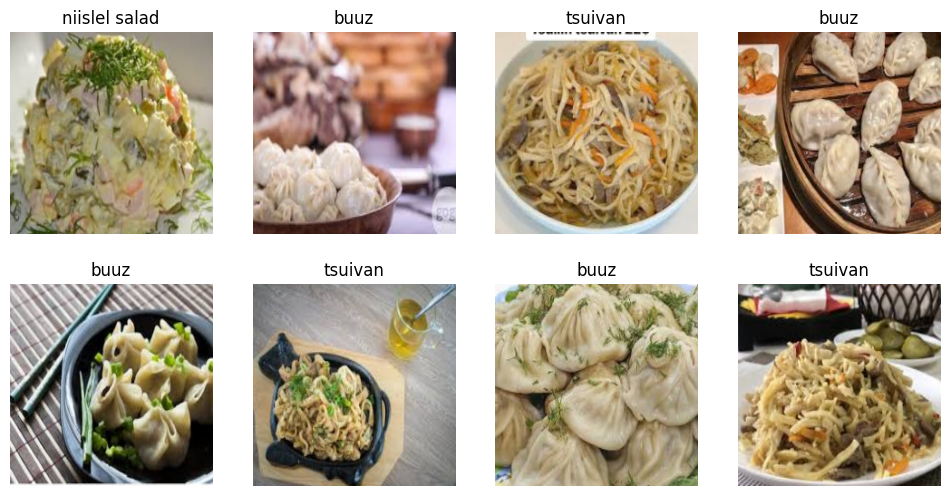

In [13]:
dls = foods.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

## Perform Transfer Learning

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 88.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.597242,3.749880,0.846154,00:23


epoch,train_loss,valid_loss,error_rate,time
0,2.363897,2.927681,0.846154,00:27
1,2.386599,2.021451,0.692308,00:28
2,2.172832,1.295545,0.576923,00:28
3,1.829104,0.887655,0.423077,00:27
4,1.608526,0.706797,0.307692,00:28
5,1.417632,0.621091,0.269231,00:28


## Evaluate Learner

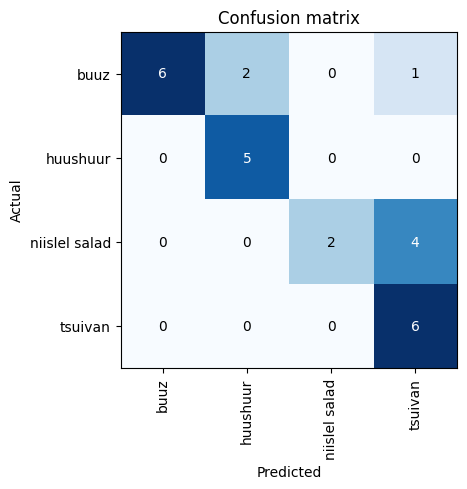

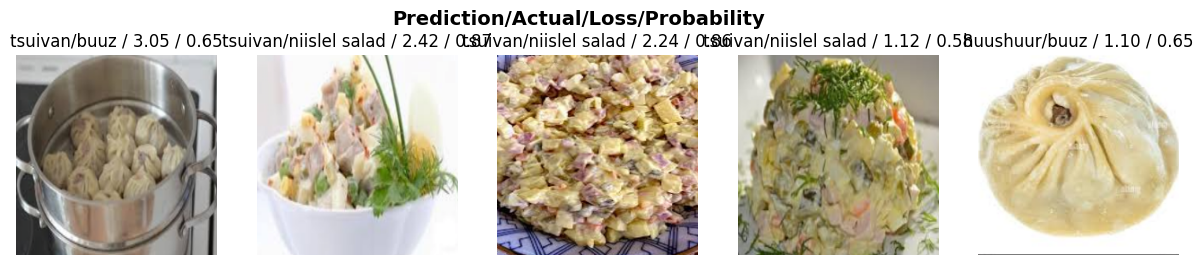

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

## Export Model

In [16]:
learn.export('mongolian_food_classifier.pkl')

In [17]:
pip install fastai

In [18]:
pip show fastai

Name: fastai
Version: 2.7.18
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: fastcore, fastdownload, fastprogress, matplotlib, packaging, pandas, pillow, pip, pyyaml, requests, scikit-learn, scipy, spacy, torch, torchvision
Required-by: 
